In [1]:
# Add current directory to path
import sys

import numpy as np

from pymatgen.core.structure import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

import quesadilla.dynmat as dynmat
#import quesadilla.symmetries as symmetries
#from quesadilla.dynmat import fcq_to_dynmat

In [2]:
material = "Si"
root = f"../tests/data/{material}/"
prim = Structure.from_file(f"{root}/POSCAR")
# TODO: move to routine for generating NDSCs
prim = SpacegroupAnalyzer(prim).get_primitive_standard_structure()
prim.translate_sites(np.arange(len(prim)), [0.0, 0.0, 0.0], to_unit_cell=True)

/Users/ashour/venvs/quesadilla/lib/python3.12/site-packages/pymatgen/core/structure.py:3175: EncodingWarning: We strongly encourage explicit `encoding`, and we would use UTF-8 by default as per PEP 686
  with zopen(filename, mode="rt", errors="replace") as file:


Structure Summary
Lattice
    abc : 3.8492788627096006 3.8492788627096006 3.8492788627096006
 angles : 59.99999999999999 60.00000000000001 60.00000000000001
 volume : 40.32952684876582
      A : np.float64(-1.6666531716513252e-16) np.float64(2.7218511865) np.float64(2.7218511865)
      B : np.float64(2.7218511865) np.float64(0.0) np.float64(2.7218511865)
      C : np.float64(2.7218511865) np.float64(2.7218511865) np.float64(3.3333063433026505e-16)
    pbc : True True True
PeriodicSite: Si (1.033e-16, 1.033e-16, 1.265e-32) [0.0, 0.0, 3.796e-17]
PeriodicSite: Si (1.361, 1.361, 1.361) [0.25, 0.25, 0.25]

In [3]:
T_sc, q_comm = dynmat.read_monserrat(f"{root}/monserrat")

In [4]:
from quesadilla.symmetries import Symmetrizer
x = Symmetrizer(prim)
#x.setup_sg_symmetries(verbose=True)
q = [0.5, 0.5, 0.5]
aq = prim.lattice.reciprocal_lattice.get_cartesian_coords(q) / (2 * np.pi)
#print(f'q = {np.around(aq / 1.895, 5)}')
for q in q_comm:
    xq = prim.lattice.reciprocal_lattice.get_cartesian_coords(q) / (2 * np.pi)
#    #print(x.nsymq)
    x.setup_lattice_symmetries(True)
    x.setup_crystal_symmetries(True)
    x.setup_little_cogroup(xq, verbose=True)
    x.get_star_q(xq, verbose=True)
#    #print(x.nsym)
#    print('----------')

Symmetries of the bravais lattice: 48
Symmetries of the crystal: 48
Symmetries of the small group of q = [0. 0. 0.]: 48
in addition sym. q -> -q+G:
irotmq = 1
gi = [0. 0. 0.]
Number of q in the star: 1
List of q in the star:
1    [0. 0. 0.]
-q is also in the star:  [0. 0. 0.]
With G =  [0. 0. 0.]
So that S_ @ q - (-q + G) [0. 0. 0.]
Symmetries of the bravais lattice: 48
Symmetries of the crystal: 48
Symmetries of the small group of q = [ 0.5 -0.   0. ]: 12
in addition sym. q -> -q+G:
irotmq = 1
gi = [ 1. -0.  0.]
Number of q in the star: 4
List of q in the star:
1    [ 0.5 -0.   0. ]
2    [-0.   0.5 -0. ]
3    [0.  0.  0.5]
4    [-0.5 -0.5 -0.5]
-q is also in the star:  [ 0.5 -0.   0. ]
With G =  [ 1. -0.  0.]
So that S_ @ q - (-q + G) [0. 0. 0.]
Symmetries of the bravais lattice: 48
Symmetries of the crystal: 48
Symmetries of the small group of q = [0.5 0.5 0. ]: 16
in addition sym. q -> -q+G:
irotmq = 1
gi = [ 1.  1. -0.]
Number of q in the star: 3
List of q in the star:
1    [ 0.5  

In [5]:
import phonopy

nd_phonon = dynmat.get_nd_phonopy(f"{root}", [4,4,4], T_sc, q_comm)

Found 1 dynamical matrices at q = (np.float64(0.0), np.float64(0.0), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(0.5), np.float64(0.0), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(0.5), np.float64(0.5), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(0.25), np.float64(0.0), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(0.25), np.float64(0.25), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(0.5), np.float64(0.25), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(-0.25), np.float64(0.25), np.float64(0.0))
Found 1 dynamical matrices at q = (np.float64(-0.25), np.float64(0.5), np.float64(0.25))
Applying q-star to q = [0. 0. 0.]...
Symmetries of the bravais lattice: 48
Symmetries of the crystal: 48
Symmetries of the small group of q = [0. 0. 0.]: 48
in addition sym. q -> -q+G:
irotmq = 1
gi = [0. 0. 0.]
      Mean difference between symmetrized and original fcq: 7.84557604068444e-15
Symmetrie

In [6]:
ref_phonon = phonopy.load(f"{root}/phonopy-diag.yaml")
ref_phonon.auto_band_structure(npoints=31)
nd_phonon.auto_band_structure(npoints=31)

/Users/ashour/venvs/quesadilla/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/Users/ashour/venvs/quesadilla/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/Users/ashour/venvs/quesadilla/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/Users/ashour/venvs/quesadilla/lib/python3.12/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/Users/ashour/venvs/quesa

(0.0, 0.8243187154390896)

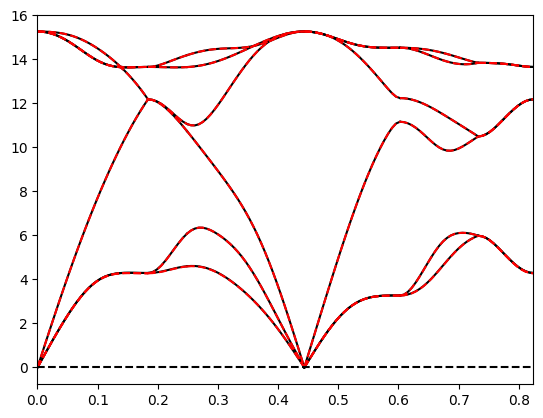

In [7]:
ref_bands = ref_phonon.get_band_structure_dict()["frequencies"]
nd_bands = nd_phonon.get_band_structure_dict()["frequencies"]
qpoints = nd_phonon.get_band_structure_dict()["distances"]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for b, q in zip(ref_bands, qpoints):
    ax.plot(q, b, "k")
for b, q in zip(nd_bands, qpoints):
    ax.plot(q, b, "r", linestyle="--")

ax.axhline(0, color="k", linestyle="--")
ax.set_xlim(np.min(qpoints[0]), np.max(qpoints[-1]))